<h1><font color="orange"><b>Prediction of cardiovascular diseases</b></font></h1>

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("data_final.csv")

In [4]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df = data.dropna()

In [ ]:
target_col = 'HeartDisease'
exp_cols = ['Age', 'Sex', 'ChestPainType','RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']

In [ ]:
X = data[exp_cols]
y = data[target_col]

In [ ]:
X = pd.get_dummies(X)

In [ ]:
bool_cols = X.select_dtypes(include=['bool']).columns

In [ ]:
bool_cols

Index(['Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
X[bool_cols] = X[bool_cols].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
trained_model = model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       135
           1       0.88      0.92      0.90       168

    accuracy                           0.89       303
   macro avg       0.89      0.88      0.89       303
weighted avg       0.89      0.89      0.89       303



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

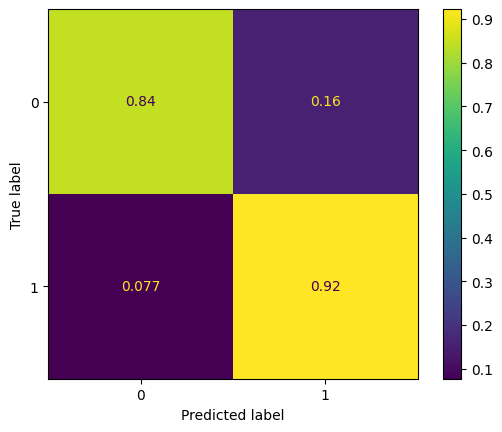

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
model.coef_

array([[ 0.10785827,  0.09119008, -0.33650674,  0.52528332, -0.15795504,
         0.3265512 , -0.34515284,  0.34515284,  0.50777695, -0.28200056,
        -0.31330151, -0.06588424,  0.12672479, -0.02000089, -0.10933275,
        -0.21459028,  0.21459028, -0.00325984,  0.59690604, -0.60155732]])

In [ ]:
model.intercept_

array([0.32932059])

In [ ]:
model.classes_

array([0, 1])